Author : Jayalakshmi K 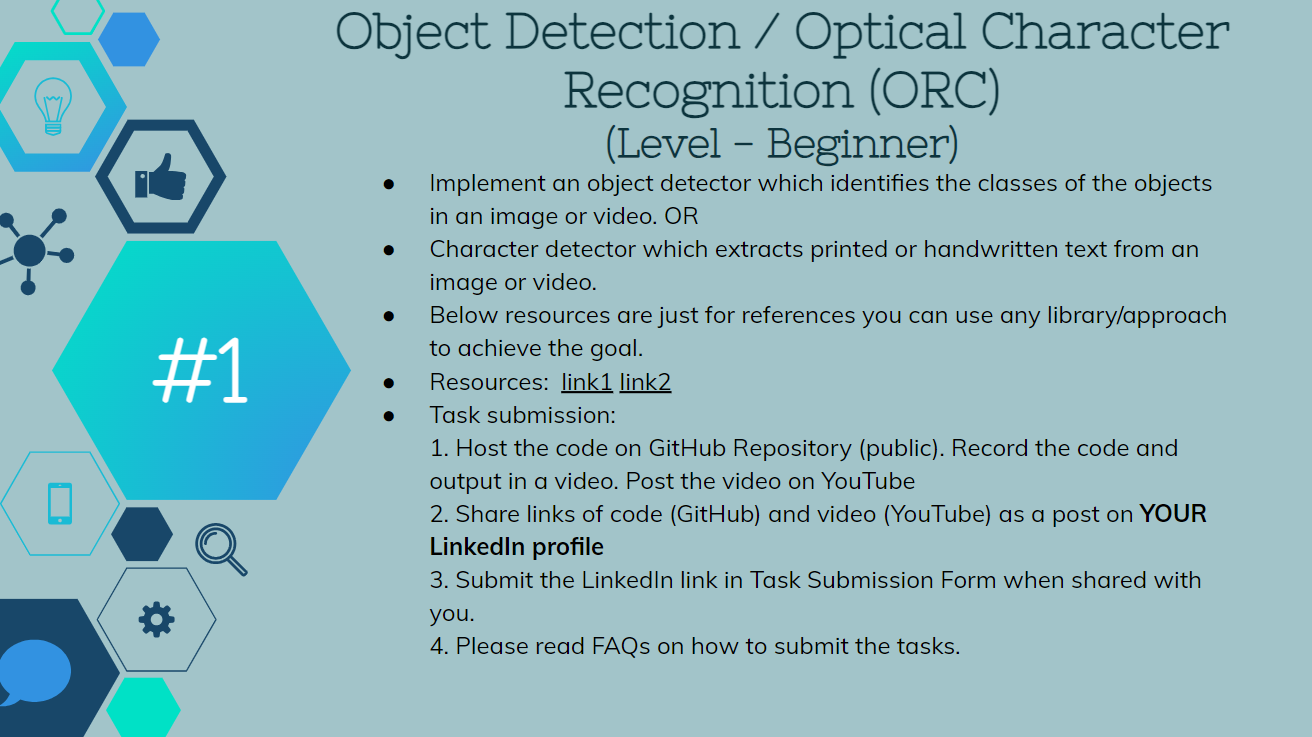

Keras-OCR VS EasyOCR VS PYTESSERACT

In [43]:
# prompt: install keras ocr -q

!pip install keras-ocr -q


In [44]:
# prompt: install easyocr

!pip install easyocr


In [54]:
# prompt: import tesseract

!pip install pytesseract
import pytesseract


In [69]:
import easyocr
import keras_ocr
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from glob import glob
# from PIL import Image
# from tqdm.notebook import tqdm
plt.style.use('ggplot')

In [71]:
# Directory containing the images
directory = '/content/drive/MyDrive/Colab Notebooks/GRIP_iot_CV/test_images_ocr'

# Get list of image files in the directory
image_files = glob(os.path.join(directory, '*.png'))

# Read each image and store in test_imgs list
test_imgs = [keras_ocr.tools.read(i) for i in image_files]


<ipython-input-72-da48548b0842>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(rows, columns, i + 1)


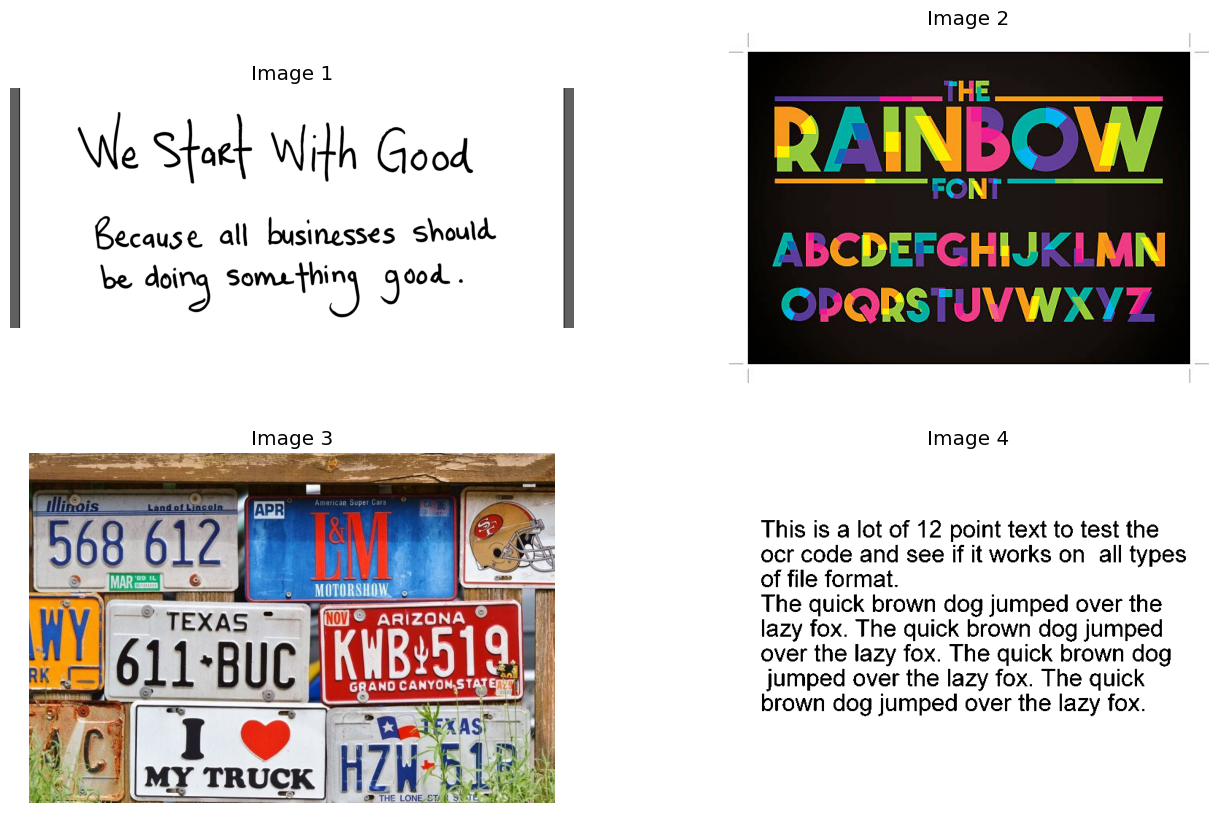

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16, 10))
rows = 2
columns = 2

for i, img in enumerate(test_imgs):
    ax = plt.subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')

plt.show()


KERAS_OCR

In [73]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline
kerasocr_preds = pipline.recognize(test_imgs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
4/4 [==============================] - 35s 8s/step


Result - Keras OCR

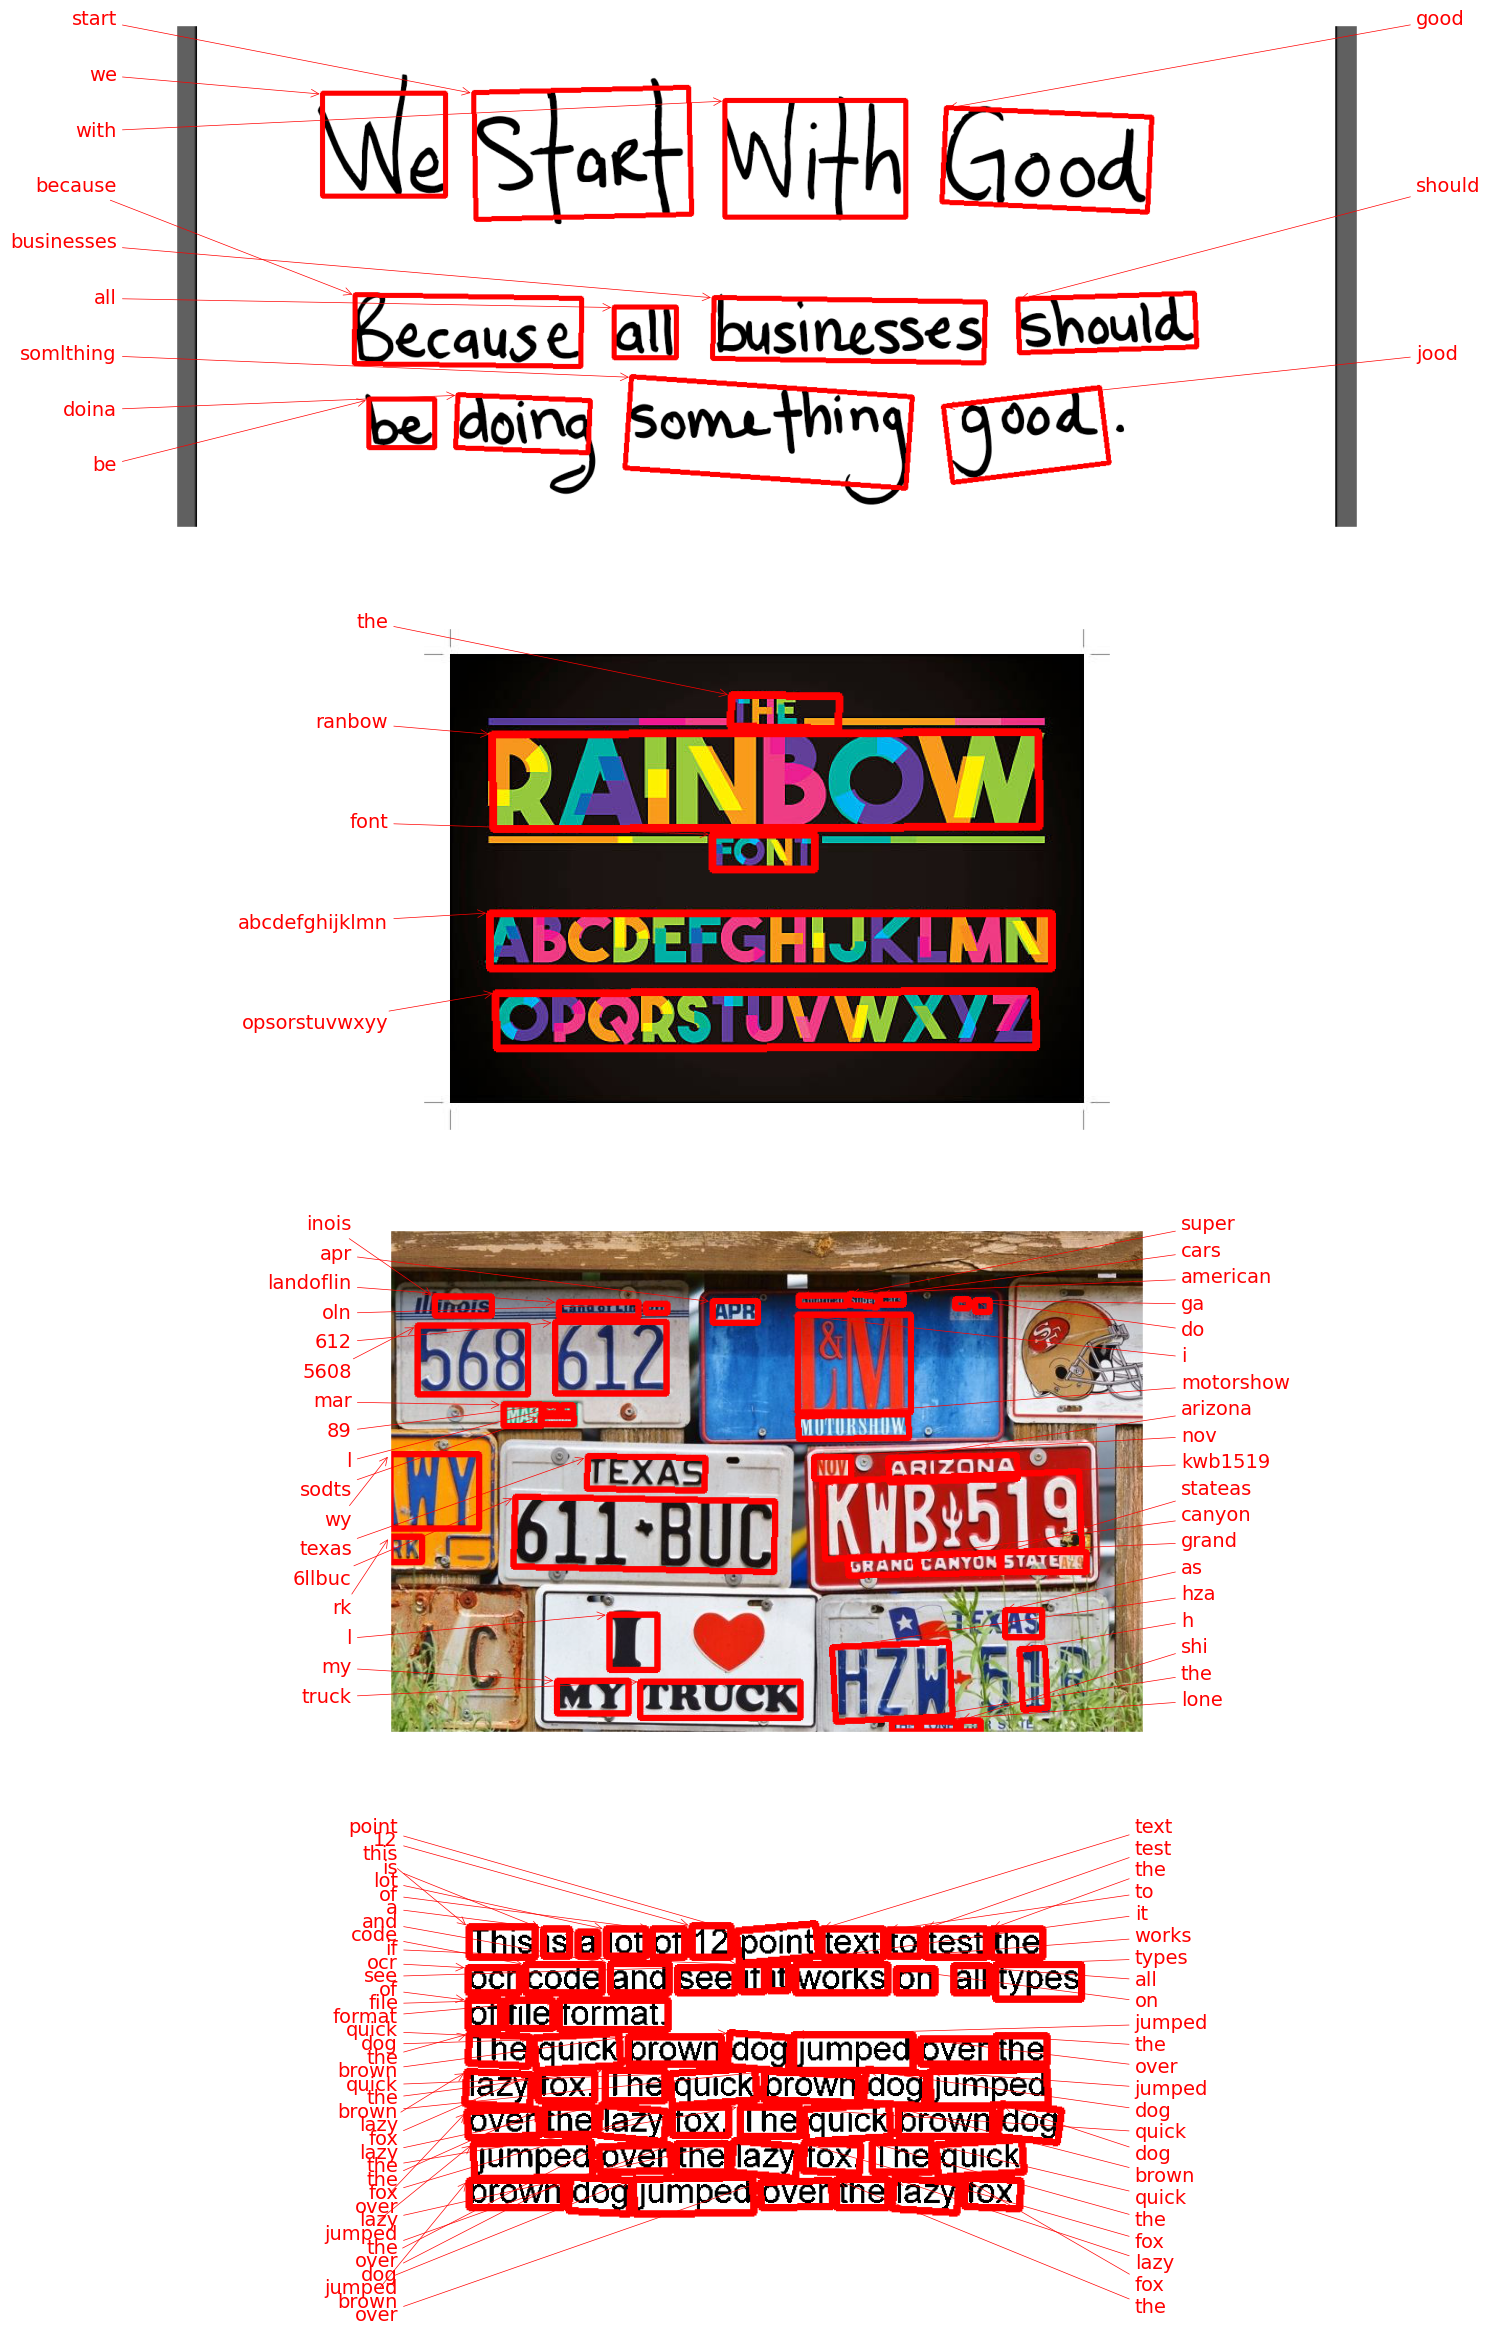

In [74]:
fig,axs = plt.subplots(nrows = 4 , figsize = (30,30))
for ax , image,  prediction in zip(axs , test_imgs , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

## EASY OCR

In [75]:
easyocr_reader = easyocr.Reader(['en']) #Initialzing the ocr

In [76]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.



EasyOCR Text detected in Image 1:
We Sfart Wifh Good
Because
all
businesses
should
be
doinq
somathin)
9od


Tesseract Text detected in Image 1:
\Ne Staet With Good

Because all businesses should
be doing Soma thing good.



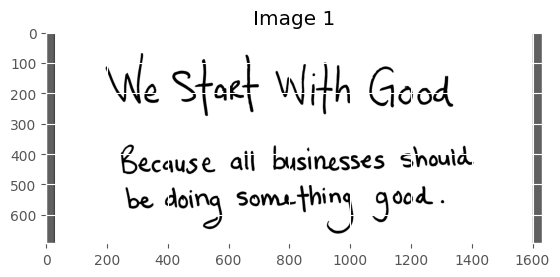


EasyOCR Text detected in Image 2:
THE
RANBOW
FONT
ABCDEFGHIJKLMN
OPQRSTUVWXYZ


Tesseract Text detected in Image 2:
ABCDEFGHIJKLM
OPQRSTUVWKXYZ

 



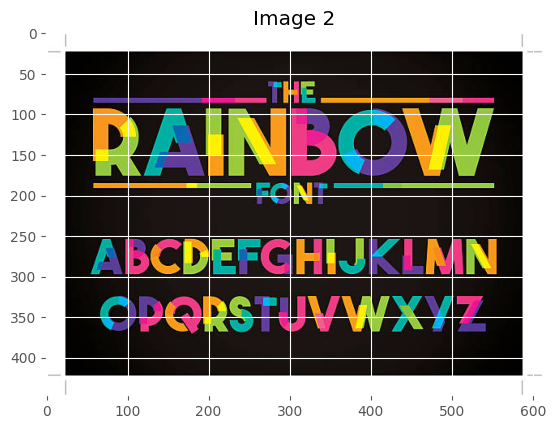


EasyOCR Text detected in Image 3:
Iigis
LandehLincoln 
American Super Cars
APR
568 612
DM
'B9rIL
MAR
Wenn
MOTORSHOW
TEXAS
no
ARizONA
MY
RK
611*BUC |KLB 519]
GPANOCANYON staten
KAS
MY TRUCK
HZI
THE LONE SH


Tesseract Text detected in Image 3:
 



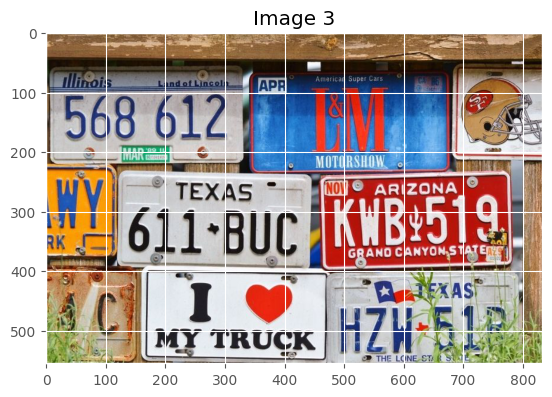


EasyOCR Text detected in Image 4:
This is a lot of 12 point text to test the
ocr code and see if it works on
all types
of file format:
The quick brown dog jumped over the
lazy fox The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


Tesseract Text detected in Image 4:
This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



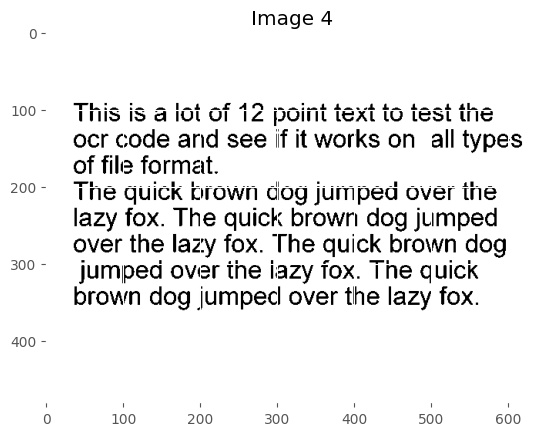

In [77]:
# Define a function to perform OCR using Tesseract
def tesseract_ocr(image):
    return pytesseract.image_to_string(image, lang='eng')

# Iterate through all images in the test_imgs list
for i, img in enumerate(test_imgs):
    # Perform OCR using EasyOCR
    easyocr_results = easyocr_reader.readtext(img)

    # Perform OCR using Tesseract
    tesseract_results = tesseract_ocr(img)

    # Print results from EasyOCR
    print(f"\nEasyOCR Text detected in Image {i + 1}:")
    for bbox, text, prob in easyocr_results:
        print(text)

    # Print results from Tesseract
    print(f"\n\nTesseract Text detected in Image {i + 1}:")
    print(tesseract_results)

    # Display the current image
    plt.imshow(img)
    plt.title(f"Image {i + 1}")
    plt.show()


Based on the analysis:

 *  Keras-OCR: Suitable for image-specific OCR but slower on CPU with unorganized text.

*   EasyOCR: Lightweight, excels in organized text like receipts, bills, and performs well with noisy images.

*   Pytesseract: Effective with high-resolution images, benefits from
preprocessing techniques, and superior in recognizing handwritten text.

*Improvement Opportunities*: Tailored preprocessing can enhance performance across all OCR tools.Choose the OCR tool based on specific requirements, considering factors like text organization, image quality, and the need for sp *italicized text*eed versus accuracy. Preprocessing techniques can further optimize results *italicized text*


